<a href="https://colab.research.google.com/github/rengo/MentoriaDiploDatos/blob/master/TP1_AnalisisYVisualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

# Trabajo Práctico N°1: Análisis y Visualización
## Introducción
En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo.

### Carga del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb

df = pd.read_csv("https://raw.githubusercontent.com/sergiobuzzi/MentoriaDiplodatos2020/master/dataset.csv", index_col=0, parse_dates=True, dayfirst=True)
df.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DEXINUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,,
1997-07-02,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,35.80,NaN
1997-07-03,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,35.79,NaN
1997-07-04,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,35.82,NaN
1997-07-08,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,35.80,NaN


In [2]:
df.tail()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DEXINUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,,
2020-05-04,32387.27930,78876.0,2842.739990,8834.110352,5753.799805,10466.79981,4378.229980,NaN,23613.80078,NaN,31715.34961,66.8835,5.5714,1.2430,1.0908,106.82,7.7532,7.0622,NaN,110.0
2020-05-05,33546.51953,79471.0,2868.439941,8930.620117,5849.399902,10729.45996,4483.129883,NaN,23868.66016,NaN,31453.50977,66.9515,5.5623,1.2449,1.0840,106.52,7.7534,7.0622,NaN,110.0
2020-05-06,34158.89063,79064.0,2848.419922,8984.860352,5853.799805,10606.20020,4433.379883,NaN,24137.48047,2878.14,31685.75000,67.0475,5.6798,1.2347,1.0795,106.07,7.7520,7.1031,NaN,112.0
2020-05-07,35850.21094,78119.0,2881.189941,9101.879883,5936.000000,10759.26953,4501.439941,19674.76953,23980.63086,2871.52,31443.38086,67.1650,5.8027,1.2349,1.0834,106.36,7.7505,7.0825,NaN,112.0
2020-05-08,36183.89844,80263.0,2929.800049,9220.349609,NaN,10904.48047,4549.640137,20179.08984,24230.16992,2895.34,31642.69922,67.2750,5.7455,1.2436,1.0841,106.50,7.7512,7.0732,NaN,112.0


### Variables
- __FECHA__: se la usa como índice del _pandasDataFrame_

#### Índices (Valores al cierre de cada día):
- __MERV__: Merval (Argentina)
- __BVSPC__: Bovespa (Brasil)
- __GSPC__: Standard & Poors 500 (Estados Unidos)
- __NDX__: Nasdaq 100 (Estados Unidos)
- __FTSE__: FTSE 100 (Reino Unido)
- __GDAXI__: DAX 30 (Alemania)
- __FCHI__: CAC 40 (Francia)
- __N225__: Nikkei 225 (Japón)
- __HSI__: Hang Seng (China)
- __SSEC__: Shanghai Composite (China)
- __BSESN__: Bombay Stock Exchange (India)

#### Tipos de cambio:
- __DEXARUS__: cantidad de pesos argentinos necesarios para adquir un dólar estadounidense
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio profundo de __sólo los índices__ del dataset, dado que las series de tipos de cambio serán usadas en el segundo práctico para expresar los índices en una moneda común.

Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.


**1. Determine el tipo de variables y el período de tiempo bajo análsis**

In [3]:
df.dtypes


MERV          float64
BVSP          float64
GSPC          float64
NDX           float64
FTSE          float64
GDAXI         float64
FCHI          float64
N225          float64
HSI           float64
SSEC          float64
BSESN         float64
DEXARUS       float64
DEXBZUS       float64
DEXUSUK       float64
DEXUSEU       float64
DEXJPUS       float64
DEXHKUS       float64
DEXCHUS       float64
DEXINUS       float64
DOLAR_BLUE    float64
dtype: object

In [4]:
#Rango de todas las columnas  
print("Tabla descriptiva de los rangos de las variables numéricas\n")
df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].describe()

Tabla descriptiva de los rangos de las variables numéricas



,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN
count,5595.000000,5653.000000,5751.000000,5751.000000,5760.000000,5792.000000,5826.000000,5599.000000,5629.000000,5543.00000,5620.000000
mean,6890.289941,44262.579338,1550.354016,2974.287436,5878.137794,7224.943426,4389.669302,14582.497111,18848.588136,2338.13610,15774.706724
std,10318.898531,26209.609565,594.996003,1984.263913,979.424196,2869.157816,923.201140,4307.819313,6052.813326,910.83418,11098.185078
min,200.860001,4761.000000,676.530029,804.640015,3287.000000,2202.959961,2403.040039,7054.979980,6660.419922,1011.50000,2600.120117
25%,726.130005,16769.000000,1131.965027,1534.460022,5214.675171,5013.897705,3683.619934,10585.689940,13529.530270,1559.71500,4710.170044
50%,2100.600098,48867.000000,1332.000000,2119.050049,5935.949951,6498.814942,4341.849853,14622.889650,19864.869140,2206.57000,15460.160155
75%,8230.250000,62156.000000,1932.994995,4062.324951,6575.300049,9531.117676,5119.805054,17621.424805,23291.039060,2972.55500,24778.218260
max,44355.089840,119528.000000,3386.149902,9718.730469,7877.500000,13789.000000,6922.330078,24270.619140,33154.121090,6092.06000,41952.628910


In [5]:
# Verificamos el índice, el tipo y rango
df.index

DatetimeIndex(['1997-07-02', '1997-07-03', '1997-07-04', '1997-07-07',
               '1997-07-08', '1997-07-09', '1997-07-10', '1997-07-11',
               '1997-07-14', '1997-07-15',
               ...
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', name='FECHA', length=6037, freq=None)

In [6]:
# A fines prácticos agregamos columnas con 'Year', 'Month' y 'Weekday Name' , calculados del índice
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

print('Rango de años desde ',  df['Year'].min(), " hasta ", df['Year'].max())

Rango de años desde  1997  hasta  2020


In [7]:
df.sample(5, random_state=0)

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,...,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DEXINUS,DOLAR_BLUE,Year,Month,Weekday Name
FECHA,,,,,,,,,,,,,,,,,,,,,
2003-11-07,963.059998,18672.0,1053.209961,1436.729980,4376.899902,3782.560059,3453.129883,10628.98047,12215.16992,1335.20,...,1.6708,1.1535,109.29,7.7692,8.2770,45.33,NaN,2003,11,Friday
2017-11-14,25611.009770,70827.0,2578.870117,6293.640137,7414.399902,13033.480470,5315.580078,22380.00977,29152.11914,3429.55,...,1.3128,1.1798,113.50,7.8033,6.6350,64.29,NaN,2017,11,Tuesday
2000-12-27,419.970001,15186.0,1328.920044,2460.209961,6218.200195,6328.160156,5857.149902,13981.49023,14748.36035,2058.24,...,1.4912,0.9306,114.20,7.7988,8.2770,46.73,NaN,2000,12,Wednesday
2014-04-24,6728.149902,51817.0,1878.609985,3591.030029,6703.000000,9548.679688,4479.540039,14404.99023,22562.80078,2057.03,...,1.6797,1.3832,102.34,7.7531,6.2484,60.06,10.6,2014,4,Thursday
1998-04-16,680.690002,12091.0,1108.170044,1227.530029,6002.000000,5292.970215,3845.899902,15883.76953,11187.79981,1316.25,...,1.6910,1.0992,131.78,7.7485,8.3100,39.74,NaN,1998,4,Thursday


**2. Indague sobre la existencia de valores faltantes. ¿Hay observaciones los fines de semana?. ¿Cómo trataría a los faltantes? ¿Por qué? (el tratamiento de los valores faltantes se hará en el proximo práctico, por lo que en lo que sigue use las series que surgen de omitirlos)**

In [8]:
print("A continuación se muestran los valores faltantes (NULL) que tiene cada columna:")
df.isnull().sum()

A continuación se muestran los valores faltantes (NULL) que tiene cada columna:


MERV             442
BVSP             384
GSPC             286
NDX              286
FTSE             277
GDAXI            245
FCHI             211
N225             438
HSI              408
SSEC             494
BSESN            417
DEXARUS          109
DEXBZUS          299
DEXUSUK          299
DEXUSEU           76
DEXJPUS          299
DEXHKUS          299
DEXCHUS          299
DEXINUS          300
DOLAR_BLUE      4820
Year               0
Month              0
Weekday Name       0
dtype: int64

In [9]:
df[df['MERV'].isnull()][['MERV','Weekday Name']]

,MERV,Weekday Name
FECHA,,
1997-07-09,NaN,Wednesday
1997-08-18,NaN,Monday
1997-12-08,NaN,Monday
1997-12-25,NaN,Thursday
1997-12-31,NaN,Wednesday
...,...,...
2020-04-25,NaN,Saturday
2020-04-26,NaN,Sunday
2020-05-01,NaN,Friday


Mostramos una tabla que correlacione los días de la semana con valores nulos y observamos que los valores faltantes se producen los fines de semana y feriados, debido a que la bolsa de valores no opera esos días.

Por el momento omitimos los valores nulos pero pensamos que sería relevante reemplazar los faltantes de los días **entre semana.**

**3. Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). No olvide el análisis de los coeficientes de asimetría y kurtosis.**

En base a los diferentes gráficos elaborados podemos decir que la mayoría de los índices no presentan una distribución normal a lo largo de la totalidad del período analizado. Esto era de esperar teniendo en cuenta que la serie de la mayoria de los índices tiene una tendencia positiva que hace que la media de la distribución cambie a lo largo del tiempo. Dicha tendencia tambien puede ser una de las posibles explicaciones a por qué la mayoría de los índices son asimétricos con una extensa cola derecha. 

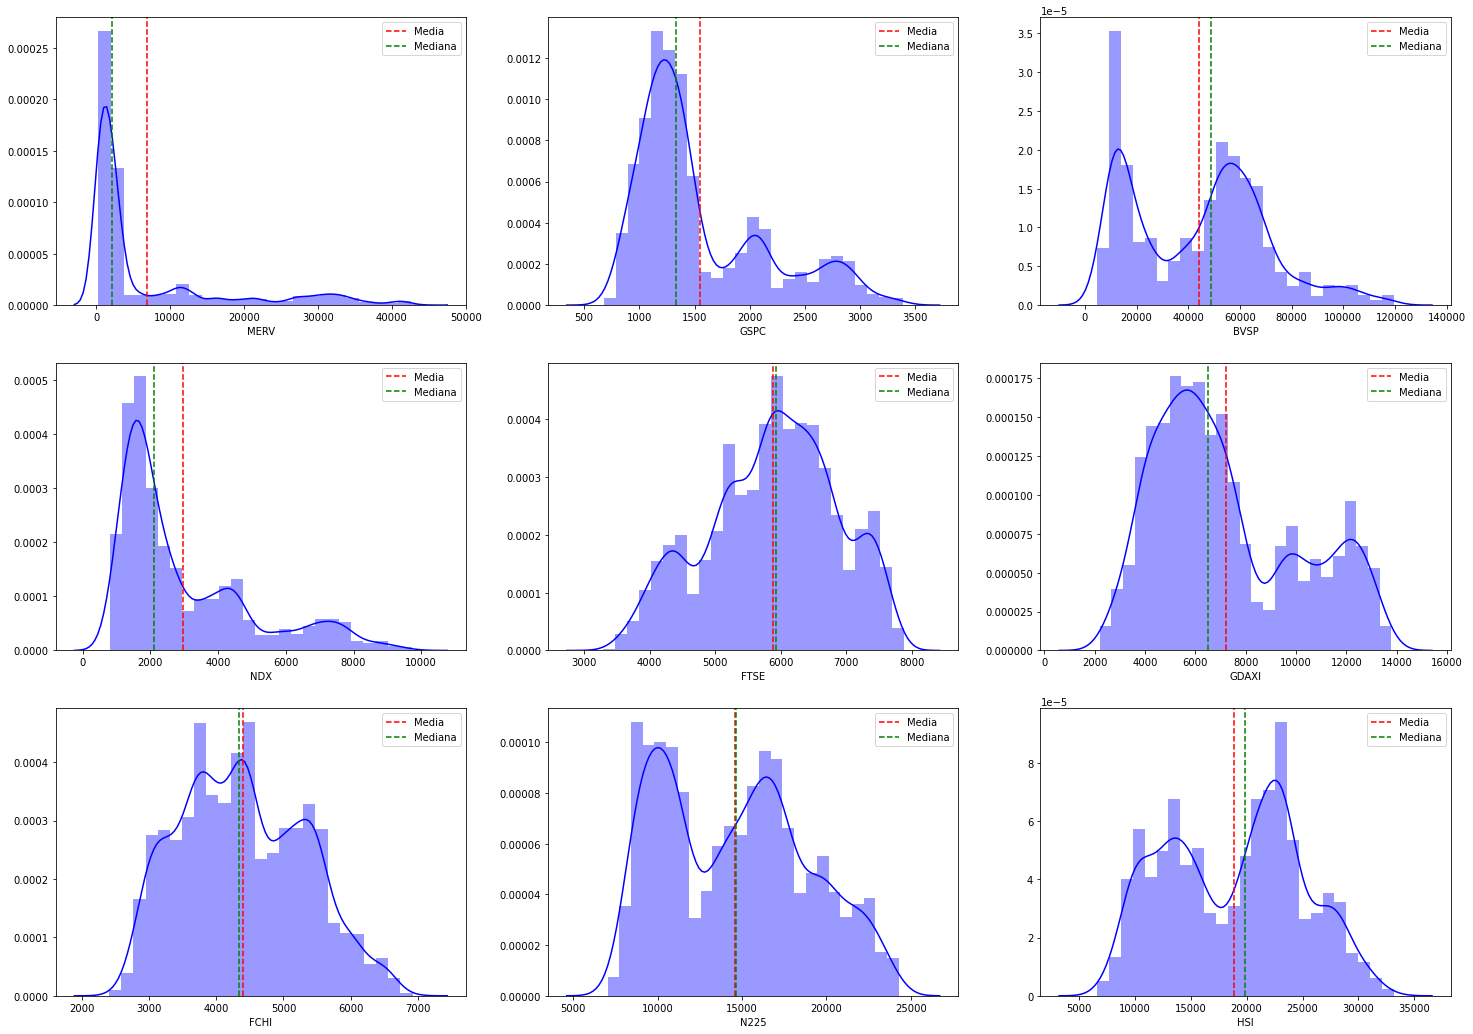

In [10]:
plt.figure(figsize= (25,18))

plt.subplot(331)
sb.distplot(df.MERV.dropna(), kde= True, bins= 25, color ="blue")
plt.axvline(df.MERV.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.MERV.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(332)
sb.distplot(df.GSPC.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.GSPC.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.GSPC.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(333)
sb.distplot(df.BVSP.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.BVSP.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.BVSP.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(334)
sb.distplot(df.NDX.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.NDX.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.NDX.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(335)
sb.distplot(df.FTSE.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.FTSE.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.FTSE.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(336)
sb.distplot(df.GDAXI.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.GDAXI.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.GDAXI.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(337)
sb.distplot(df.FCHI.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.FCHI.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.FCHI.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(338)
sb.distplot(df.N225.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.N225.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.N225.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

plt.subplot(339)
sb.distplot(df.HSI.dropna(), bins= 25, kde = True, color ="blue")
plt.axvline(df.HSI.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df.HSI.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.legend()

#plt.subplot(3310)
#sb.distplot(df.SSEC.dropna(), bins= 25, kde = True, color ="blue")

#plt.subplot(3311)
#sb.distplot(df.BSESN.dropna(), bins= 25, kde = True, color ="blue")

plt.savefig('sampleFileName.png')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

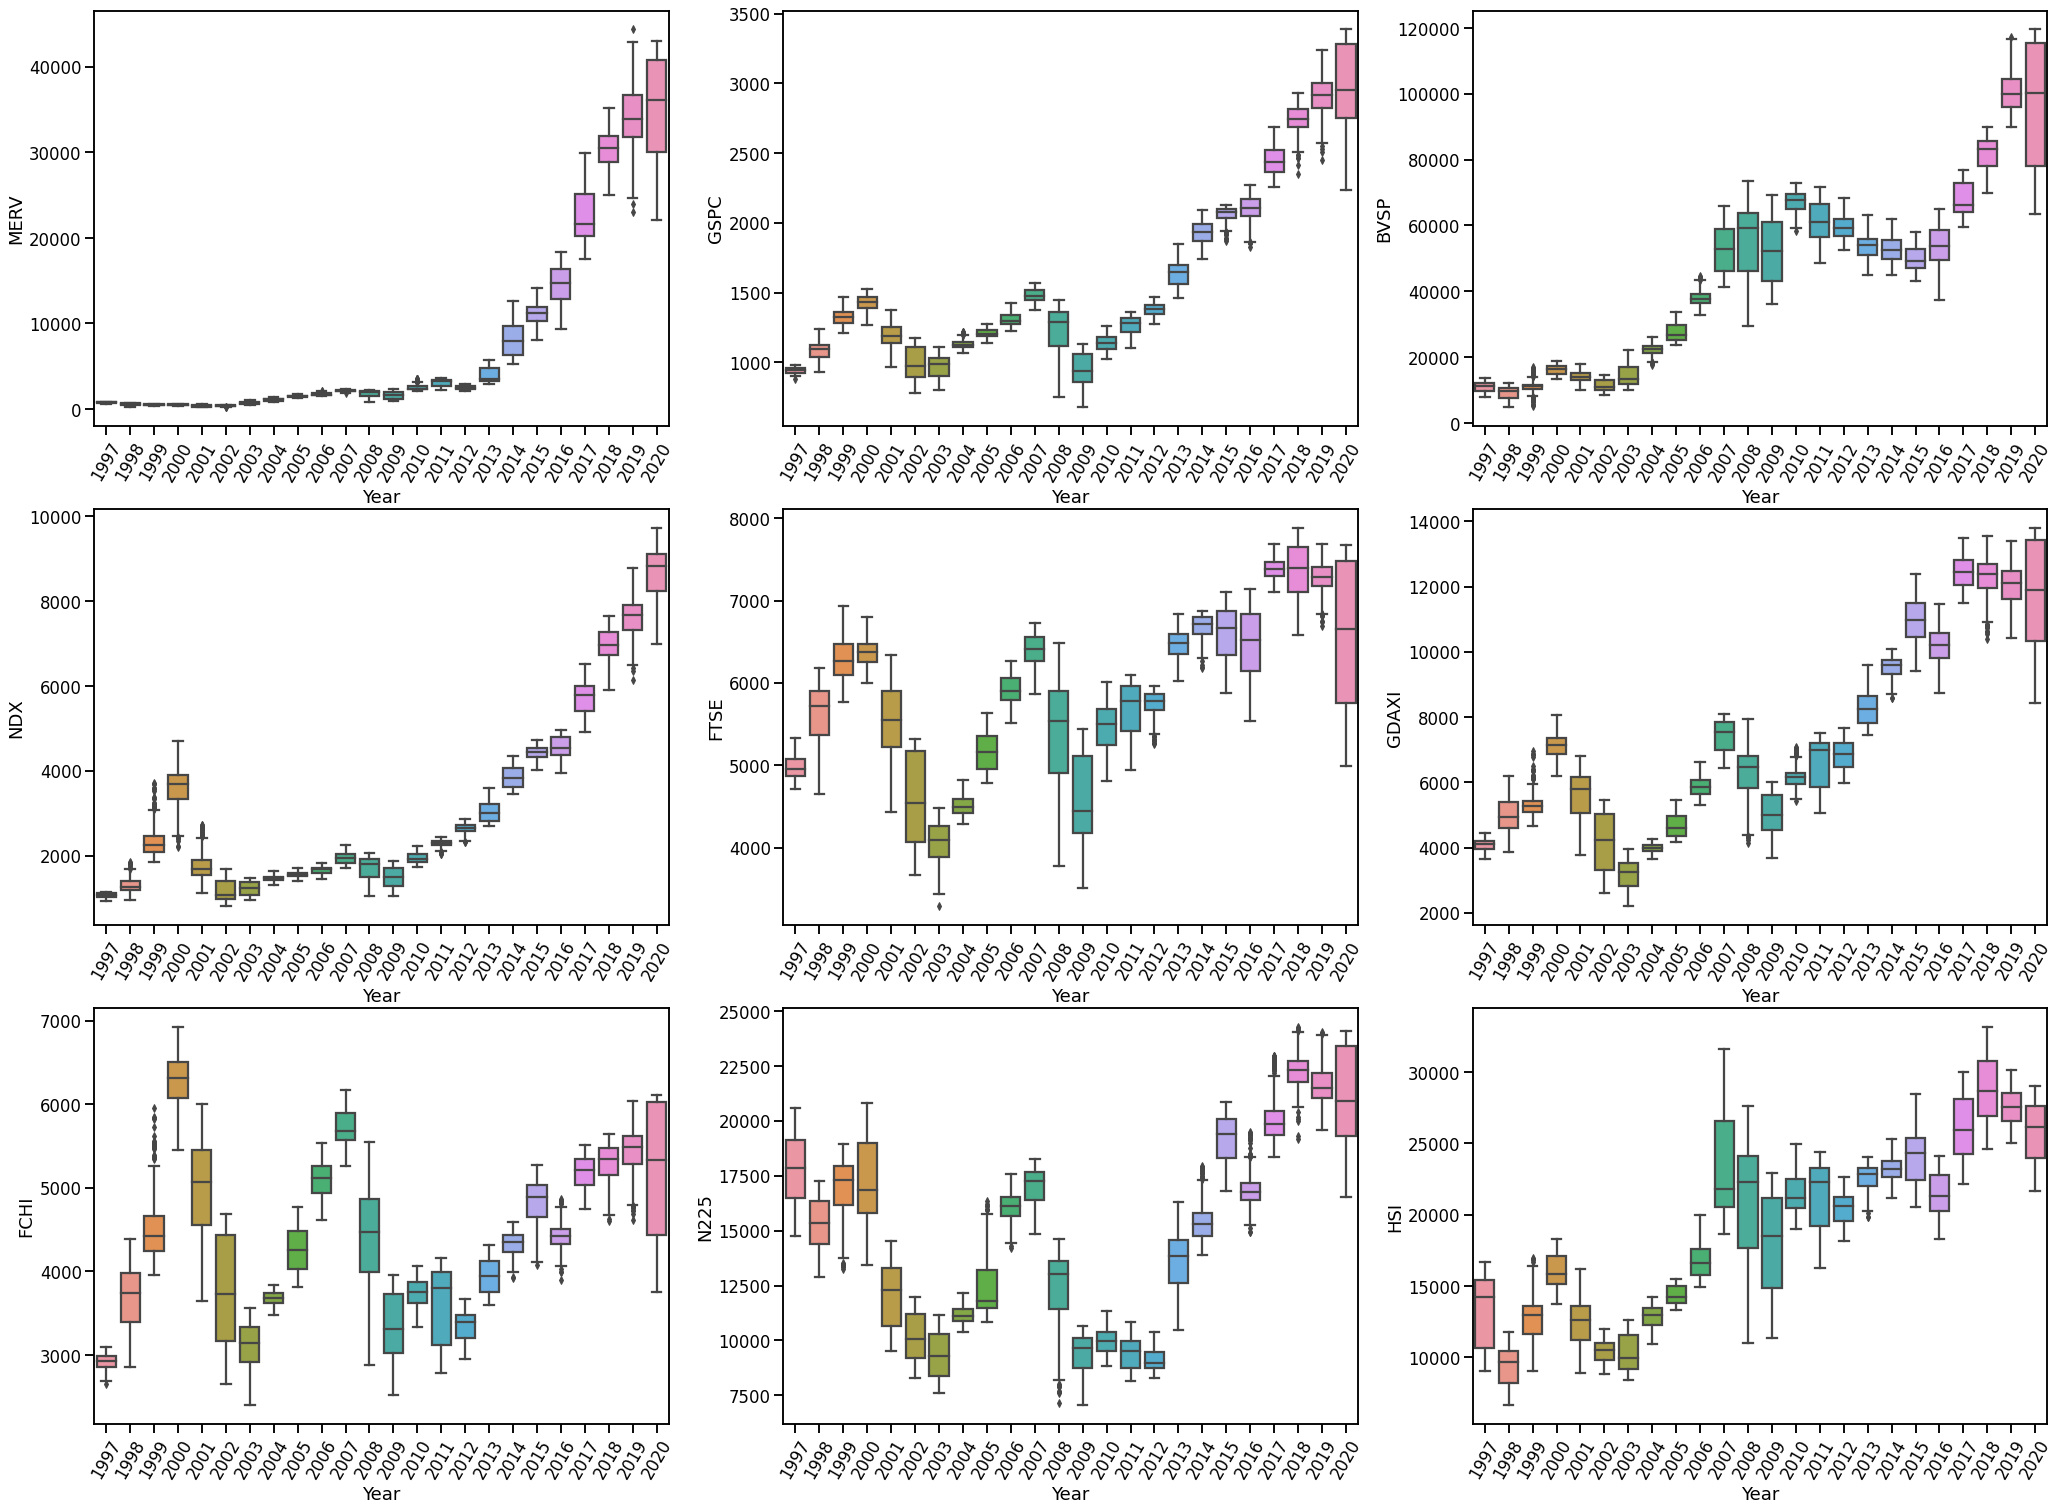

In [ ]:
plt.figure(figsize= (35, 26))
sb.set_context(context="talk")

plt.subplot(331)
sb.boxplot(data= df, x="Year", y="MERV")
plt.xticks(rotation=60)

plt.subplot(332)
sb.boxplot(data= df, x="Year", y="GSPC")
plt.xticks(rotation=60)

plt.subplot(333)
sb.boxplot(data= df, x="Year", y="BVSP")
plt.xticks(rotation=60)

plt.subplot(334)
sb.boxplot(data= df, x="Year", y="NDX")
plt.xticks(rotation=60)

plt.subplot(335)
sb.boxplot(data= df, x="Year", y="FTSE")
plt.xticks(rotation=60)

plt.subplot(336)
sb.boxplot(data= df, x="Year", y="GDAXI")
plt.xticks(rotation=60)

plt.subplot(337)
sb.boxplot(data= df, x="Year", y="FCHI")
plt.xticks(rotation=60)

plt.subplot(338)
sb.boxplot(data= df, x="Year", y="N225")
plt.xticks(rotation=60)

plt.subplot(339)
sb.boxplot(data= df, x="Year", y="HSI")
plt.xticks(rotation=60)

A continuación se presenta un resumen de las medidas de estadística descriptiva de cada uno de los índices. 

In [ ]:
df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].describe()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN
count,5595.000000,5653.000000,5751.000000,5751.000000,5760.000000,5792.000000,5826.000000,5599.000000,5629.000000,5543.00000,5620.000000
mean,6890.289941,44262.579338,1550.354016,2974.287436,5878.137794,7224.943426,4389.669302,14582.497111,18848.588136,2338.13610,15774.706724
std,10318.898531,26209.609565,594.996003,1984.263913,979.424196,2869.157816,923.201140,4307.819313,6052.813326,910.83418,11098.185078
min,200.860001,4761.000000,676.530029,804.640015,3287.000000,2202.959961,2403.040039,7054.979980,6660.419922,1011.50000,2600.120117
25%,726.130005,16769.000000,1131.965027,1534.460022,5214.675171,5013.897705,3683.619934,10585.689940,13529.530270,1559.71500,4710.170044
50%,2100.600098,48867.000000,1332.000000,2119.050049,5935.949951,6498.814942,4341.849853,14622.889650,19864.869140,2206.57000,15460.160155
75%,8230.250000,62156.000000,1932.994995,4062.324951,6575.300049,9531.117676,5119.805054,17621.424805,23291.039060,2972.55500,24778.218260
max,44355.089840,119528.000000,3386.149902,9718.730469,7877.500000,13789.000000,6922.330078,24270.619140,33154.121090,6092.06000,41952.628910


Una forma simple y rápida de saber si una distribución es asimétrica es, además de mirando el gráfico, verificando que si la media es disntinto que la mediana. Obviamente este no nos da una medida exacta de la asimetria como lo hace el coeficiente de asimetria, pero sirve para tener un pantallazo inicial respecto al tipo de distribución que debemos esperar. Por eso a continuación se comparan las medias y medianas de cada índice y se determinan si son asimétricas y qué tipo de asimetría tienen:
  - Si la media es menor a la mediana, existe asimetría izquierda o negativa.
  - Si la media es mayor a la mediana, existe asimetría derecha o positiva.

Pero además de identificar el tipo de asimetria que presenta cada indice se puede calcular la magnitud de dicha asimetría usando el coeficiente de asimetría. Para las distribuciones asimétricas derechas, deberiamos obtener un coeficiente de asimetría positivo mientras que para las asimétricas derechas, uno negativo. 

Por otra parte, la curtosis, también conocida como medida de apuntamiento determina el grado de concentración que presentan los valores al rededor de la media. Es deir, la curtosis indica la cantidad de datos que hay cercanos a la media, de manera que a mayor grado de curtosis, más puntiaguda será la forma de la curva.
Debido a la gran dispersión que hay en los datos (debido al gran espectro de años considerado en la muestra), la mayoría de las distribuciones son platicúrticas, lo cual significa que los datos no tienen una "punta" marcada

In [ ]:
df1 = pd.DataFrame({
    "Media" : df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].mean(),
    "Mediana" : df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].median()
})

df1.loc[df1['Media'] < df1['Mediana'], 'Asimetria'] = 'Asimétrica Izquierda'
df1.loc[df1['Media'] > df1['Mediana'], 'Asimetria'] = 'Asimétrica Derecha'

df1['Coef. de Asimetría'] = df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].skew()
df1['Kurtosis'] = df[['MERV','BVSP', 'GSPC', 'NDX',"FTSE","GDAXI","FCHI","N225","HSI","SSEC","BSESN"]].kurt()

df1.loc[df1['Kurtosis'] < 3, 'Tipo de Kurtosis'] = 'Platicúrtica'
df1.loc[df1['Kurtosis'] > 3, 'Tipo de Kurtosis'] = 'Leptocúrtica'

df1

,Media,Mediana,Asimetria,Coef. de Asimetría,Kurtosis,Tipo de Kurtosis
MERV,6890.289941,2100.600098,Asimétrica Derecha,1.827702,2.131544,Platicúrtica
BVSP,44262.579338,48867.000000,Asimétrica Izquierda,0.322671,-0.594620,Platicúrtica
GSPC,1550.354016,1332.000000,Asimétrica Derecha,1.126769,0.257438,Platicúrtica
NDX,2974.287436,2119.050049,Asimétrica Derecha,1.290978,0.728961,Platicúrtica
FTSE,5878.137794,5935.949951,Asimétrica Izquierda,-0.245706,-0.617902,Platicúrtica
GDAXI,7224.943426,6498.814942,Asimétrica Derecha,0.601959,-0.755635,Platicúrtica
FCHI,4389.669302,4341.849853,Asimétrica Derecha,0.244503,-0.731029,Platicúrtica
N225,14582.497111,14622.889650,Asimétrica Izquierda,0.253663,-1.011658,Platicúrtica
HSI,18848.588136,19864.869140,Asimétrica Izquierda,0.007725,-1.054543,Platicúrtica
SSEC,2338.136100,2206.570000,Asimétrica Derecha,0.851485,0.934743,Platicúrtica


**4. ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?**


Como los outliers no se deben a errores de carga sino a acontecimientos inusuales no se deben eliminar. En caso de que el mismo si sea un error de carga deberia tratar de buscar su verdadero valor. Y si esto último no es posible tratar de reemplazar el valor evaluando cada situación en particular con un promedio por ejemplo.

**5. Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

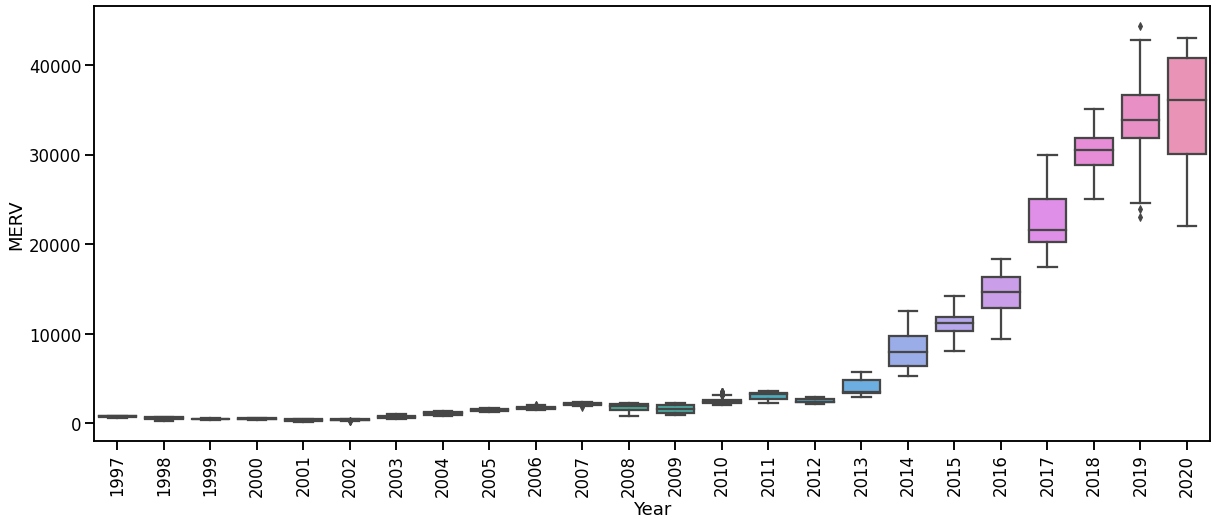

In [ ]:
plt.figure(figsize= (20,8))
sb.set_context(context="talk")
sb.boxplot(data= df, x="Year", y="MERV")
plt.xticks(rotation=90)

Observamos que la distribución **no** se mantiene inalterada a lo largo del tiempo.

**6. Explore la existencia de estacionalidad.**

Claramente se observa en los siguientes gráficos que no tiene  una estacionalidad. Sí existe una tendencia a la suba, que es como se espera que se comporte el mercado financiero a lo largo del tiempo.Se observan algunos puntos criticos del MERVAL que se corresponden con algunos eventos como las PASOS de agosto de 2019. 

Text(0.5, 1.0, 'Análisis de estacionalidad del MERVAL en 2019')

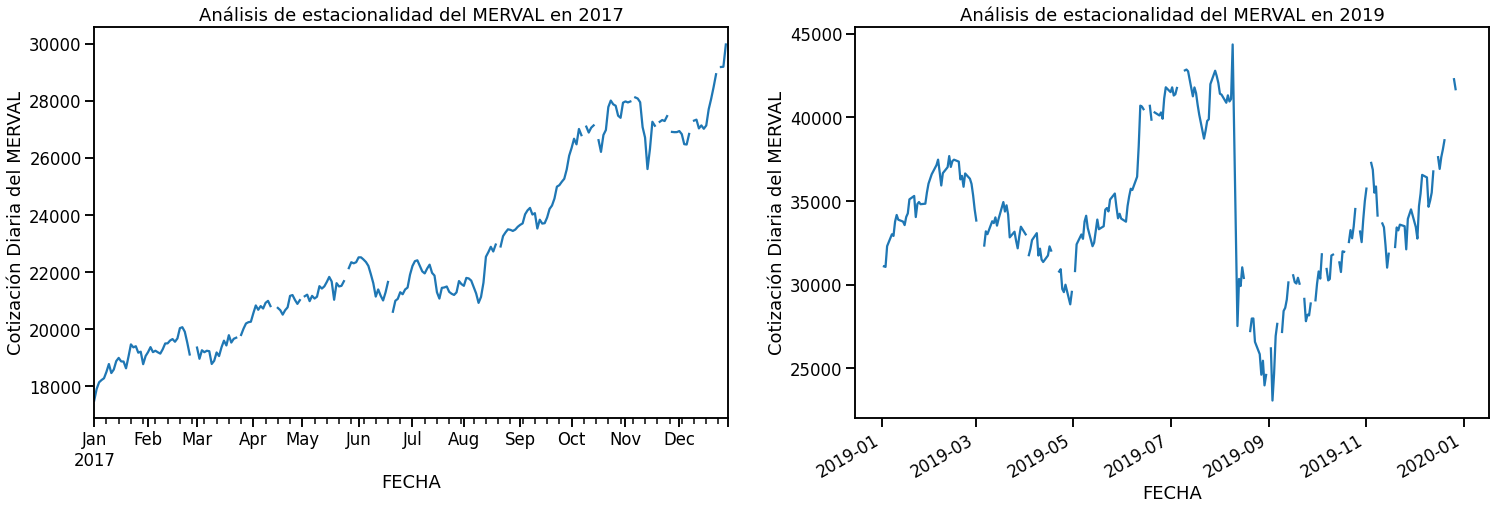

In [ ]:
plt.figure(figsize= (25,8))

plt.subplot(121)
ax = df.loc['2017', 'MERV'].plot()
ax.set_ylabel('Cotización Diaria del MERVAL');
ax.set_title('Análisis de estacionalidad del MERVAL en 2017')

plt.subplot(122)
ax = df.loc['2019', 'MERV'].plot()
ax.set_ylabel('Cotización Diaria del MERVAL');
ax.set_title('Análisis de estacionalidad del MERVAL en 2019')

Text(0.5, 1.0, 'Análisis de estacionalidad del SP500 en 2019')

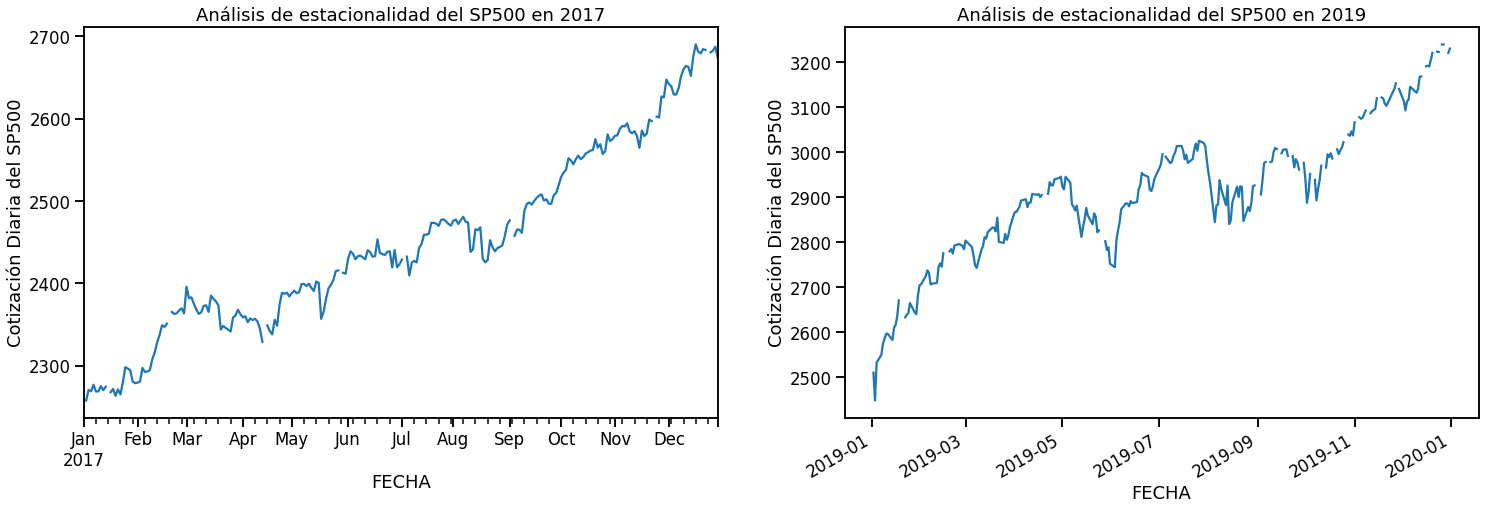

In [ ]:
plt.figure(figsize= (25,8))

plt.subplot(121)
ax = df.loc['2017', 'GSPC'].plot()
ax.set_ylabel('Cotización Diaria del SP500');
ax.set_title('Análisis de estacionalidad del SP500 en 2017')

plt.subplot(122)
ax = df.loc['2019', 'GSPC'].plot()
ax.set_ylabel('Cotización Diaria del SP500');
ax.set_title('Análisis de estacionalidad del SP500 en 2019')

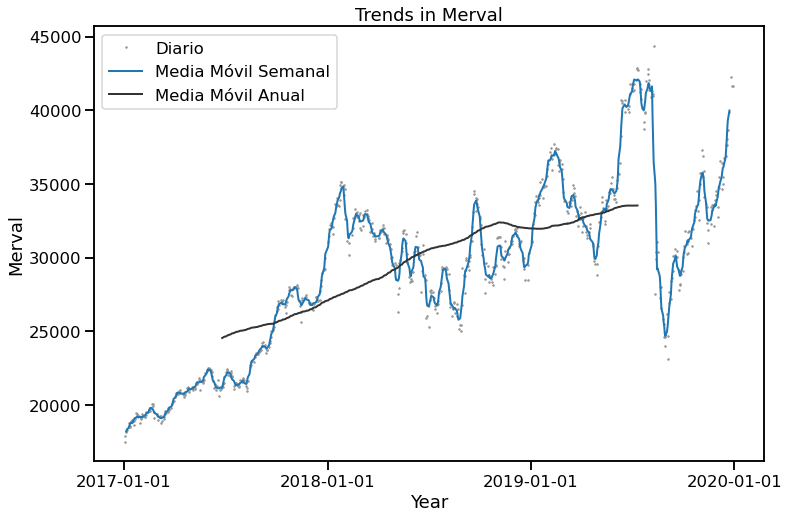

In [11]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
import matplotlib.dates as mdates

sb.set_context(context="talk")

df_7d = df.loc['2017':'2019'][['MERV']].dropna().rolling(7, center=True).mean()
df_365d = df.loc['2017':'2019'][['MERV']].dropna().rolling(window=365, center=True, min_periods=300).mean()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.loc['2017':'2019']['MERV'].dropna(), marker='.', markersize=3, color='0.6', linestyle='None', label='Diario')
ax.plot(df_7d['MERV'], linewidth=2, label='Media Móvil Semanal')
ax.plot(df_365d['MERV'], color='0.2', linewidth=2, label='Media Móvil Anual')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Merval')
ax.set_title('Trends in Merval');

plt.savefig('estacionariedadmerval.png')

En este gráfico de tendencias del Merval, con indicadores diarios, y medias móviles semanales y anuales, tampoco podemos definir estacionalidad.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

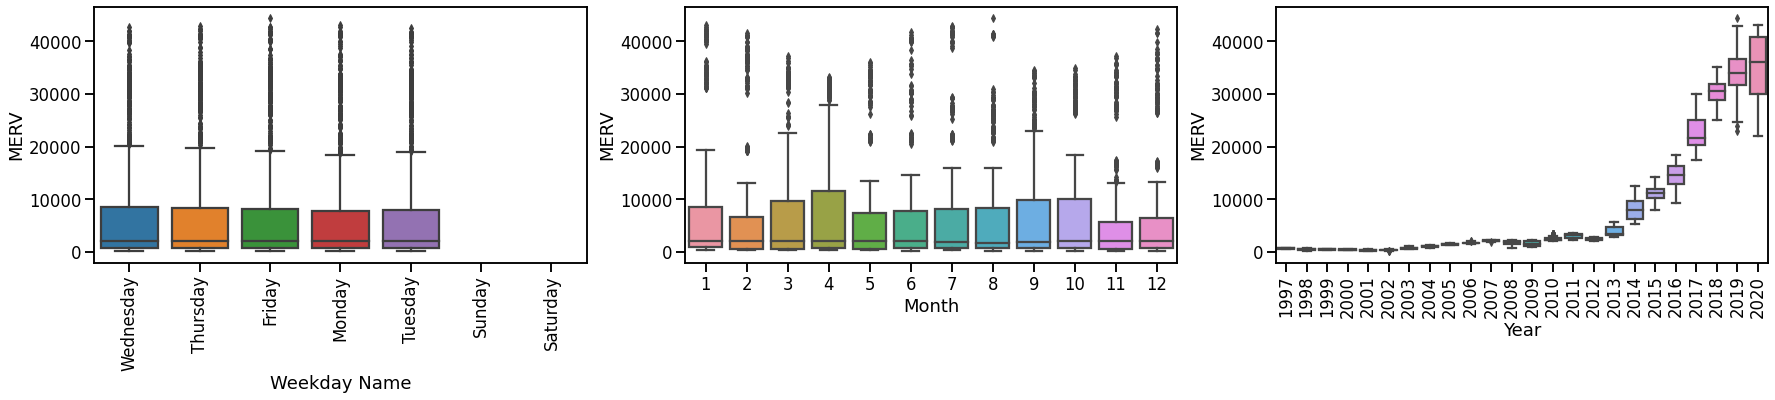

In [ ]:
plt.figure(figsize=(30,16))

plt.subplot(331)
sb.boxplot(data=df, x='Weekday Name', y='MERV')
plt.xticks(rotation=90)

plt.subplot(332)
sb.boxplot(data=df, x='Month', y='MERV')

plt.subplot(333)
sb.boxplot(data=df, x='Year', y='MERV')
plt.xticks(rotation=90)

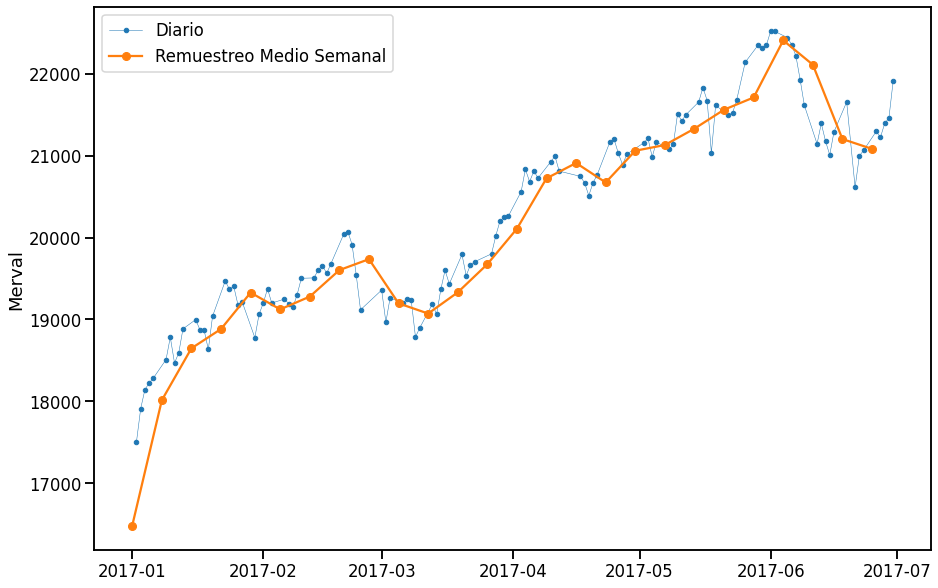

In [ ]:
# RESAMPLING
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
df_weekly_mean = df[['MERV']].resample('W').mean()

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df.loc[start:end, 'MERV'].dropna(), marker='.', linestyle='-', linewidth=0.5, label='Diario')
ax.plot(df_weekly_mean.loc[start:end, 'MERV'].dropna(), marker='o', markersize=8, linestyle='-', label='Remuestreo Medio Semanal')
ax.set_ylabel('Merval')
ax.legend();

**7. Estudie la evolución temporal de los índices. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Coinciden con las noticias? ¿Los índices tienden a moverse en forma conjunta? En caso de que existan crisis, ¿son globales o propias de mercados individuales?**

Todos los valores están aplanados, los índices aislados no dicen nada. Se destaca el índice de Brasil solamente. Al igual como  en los puntos anteriores se deberia estandarizar, dividir a toda la serie por el primer valor, para que todos partan desde un mismo lugar. Además se podría estabilizar la varianza y que  se vea la variablidad porcentual y de esta forma poder tener una mejor vizualizaciones sobre determinados hechos financieros tal como las crisis de determinados años

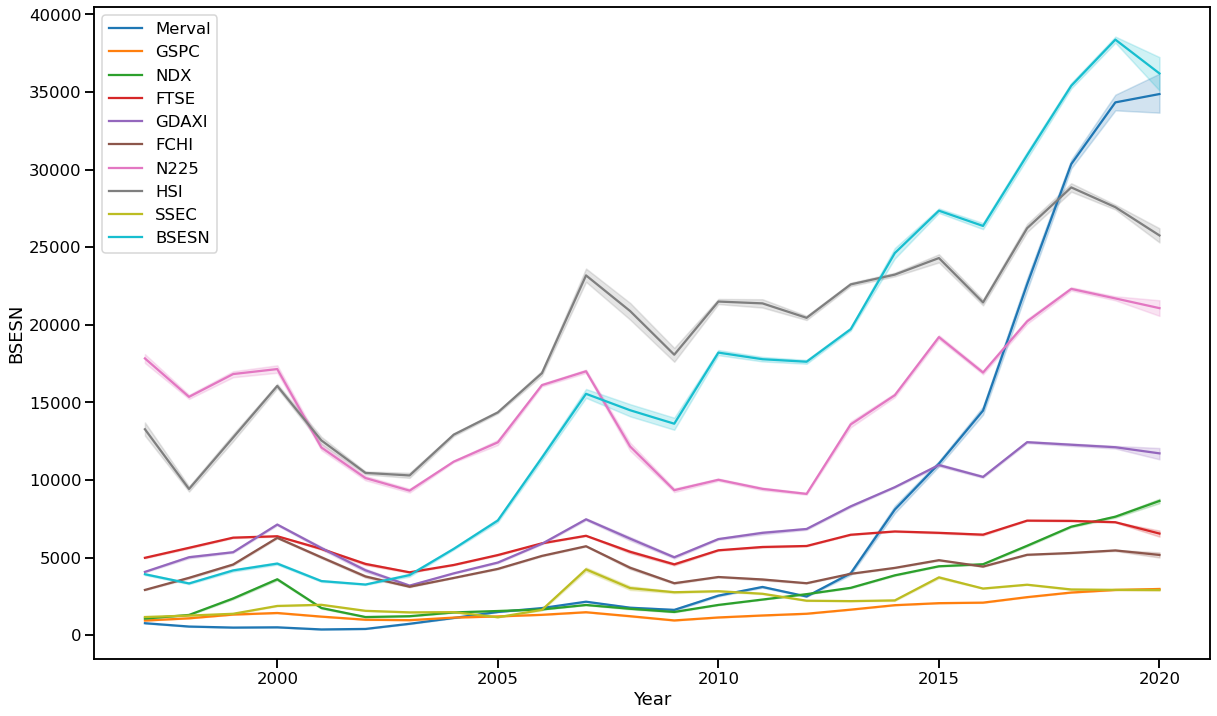

In [13]:
plt.figure(figsize=(20,12))

sb.lineplot(data = df, x= 'Year', y='MERV', label = "Merval")
#sb.lineplot(data = df, x= 'Year', y='BVSP', label = "Bovespa")
sb.lineplot(data = df, x= 'Year', y='GSPC', label = "GSPC")
sb.lineplot(data = df, x= 'Year', y='NDX', label = "NDX")
sb.lineplot(data = df, x= 'Year', y='FTSE', label = "FTSE")
sb.lineplot(data = df, x= 'Year', y='GDAXI', label = "GDAXI")
sb.lineplot(data = df, x= 'Year', y='FCHI', label = "FCHI")
sb.lineplot(data = df, x= 'Year', y='N225', label = "N225")
sb.lineplot(data = df, x= 'Year', y='HSI', label = "HSI")
sb.lineplot(data = df, x= 'Year', y='SSEC', label = "SSEC")
sb.lineplot(data = df, x= 'Year', y='BSESN', label = "BSESN")
plt.legend()

plt.savefig('estacionariedadtodos.png')

**8. Investigue si los índices tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?**

Para responder este punto dividimos los distintos índices en pequeños subgrupos los cuales intuimos a priori que tienen más razones para estar correlacionados.

En este sentido primero se observa el desempeño del Merval versus el Bovespa y el SyP 500. Lo comparamos con Brasil por ser el principal socio comercial de Argentina y con el SyP 500 por ser el Índice de empresas líderes de EEUU. Dada la marcada tendencia de los agentes argentinos a utilizar el dólar y los movimimientos del mercado estadounidense como referencia para la economía local y la elevada influencia de las importaciones brasileras en el desempeño de las empresas, esperamos que exista al menos cierto grado de correlacion entre estos 
índices.

Luego agrupamos el SyP 500, el GDAXI y el Nikkei. La razón detrás de esto fue, además de que son los índices más fuertes de Asia, Europa y América respectivamente, mera curiosidad. En un día cualquiera de operacion bursátil en el mundo, el primero en abrir es el mercado asiático, seguido por el europe y finalmente el estadounidense. Lo que buscamos es tener una idea rápida acerca de que si los dias en los que el mercado asiático cierra al alza, el mercado europeo y estadunidense "adoptan" su tendencia o se comportan de manera independiente. 







<Figure size 1440x864 with 0 Axes>

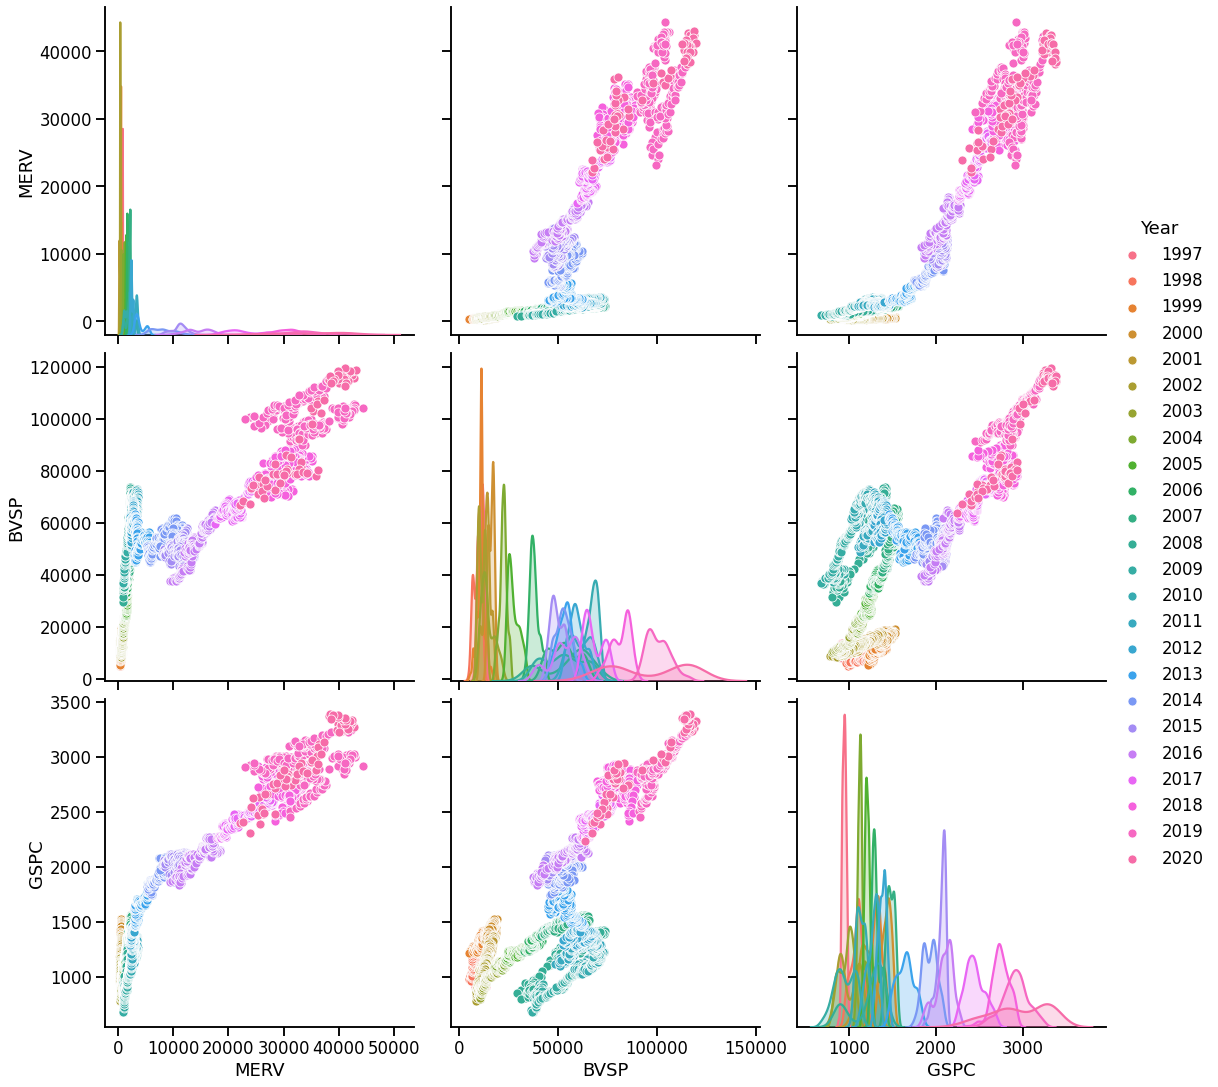

In [ ]:
df2 = df.iloc[:,[0,1,2,-3]]

plt.figure(figsize=(20,12))

sb.pairplot(
    data=df2,
    vars=['MERV', 'BVSP','GSPC'],
    hue = 'Year', height = 5
)

<Figure size 1440x864 with 0 Axes>

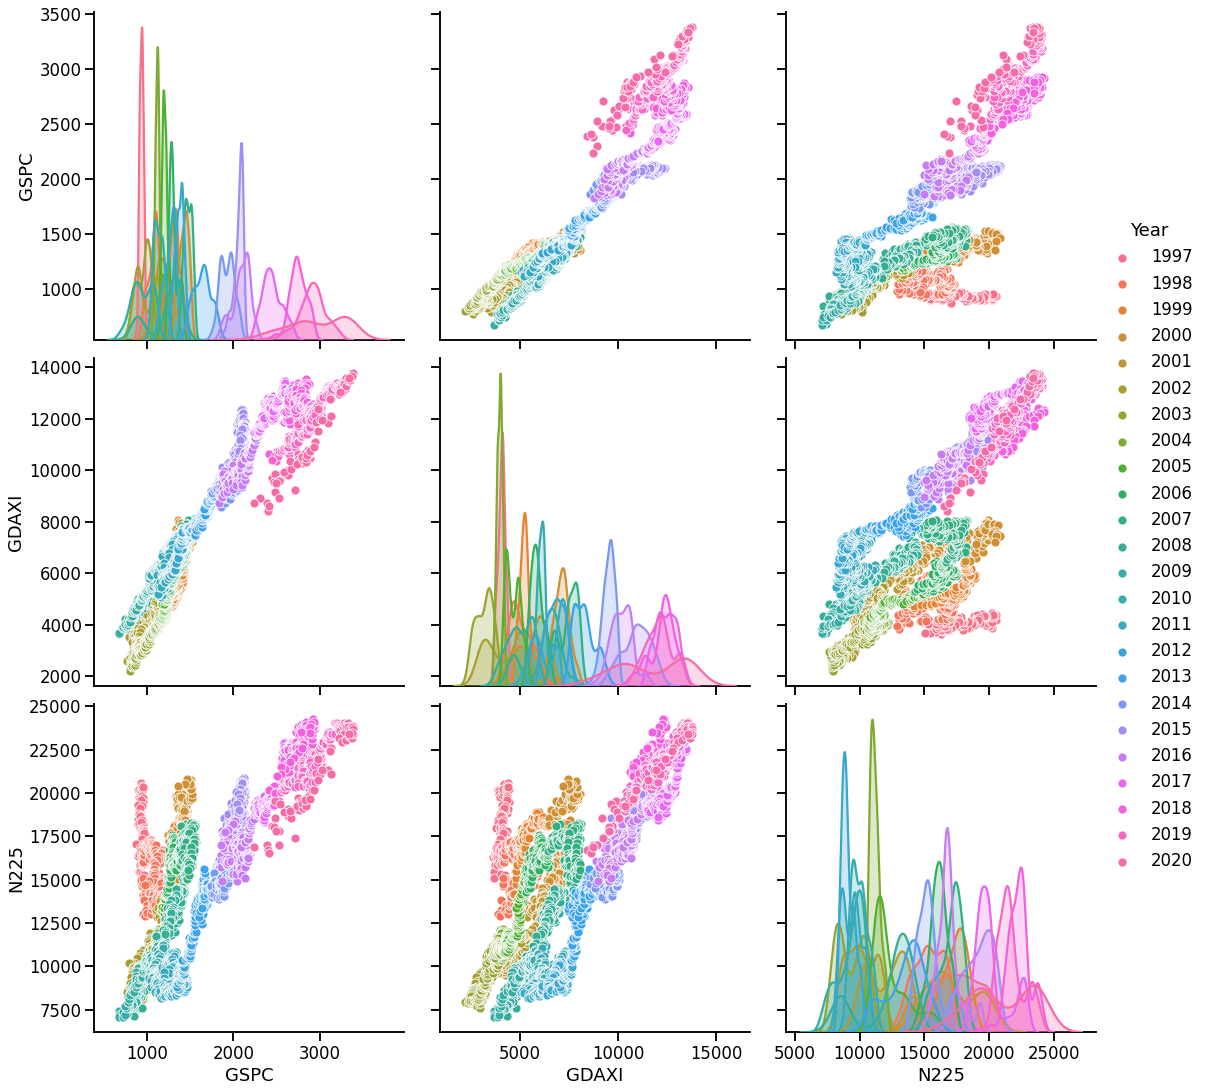

In [ ]:
df3 = df.loc[:,['GSPC','GDAXI','N225','Year']]

plt.figure(figsize=(20,12))

sb.pairplot(
    data=df3,
    vars=['GSPC', 'GDAXI','N225'],
    hue = 'Year', height = 5
)

**9. Seleccione un índice y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento entre el índice y su valores retardado 2, 3 y 4 períodos.**

Text(0.5, 1.0, 'Dispersión de Merval con 1 período retardado')

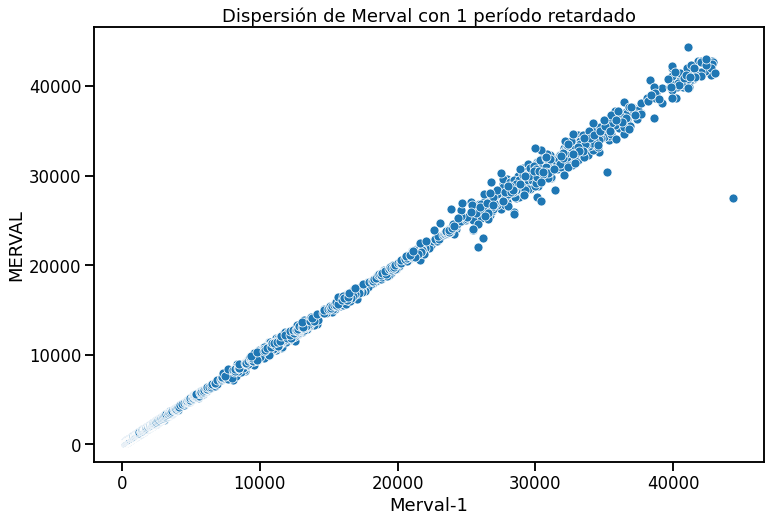

In [106]:
merval = df[['MERV']].dropna()
merval_retrasado = merval.shift(periods=1, axis=0).reset_index()

merval2 = merval.reset_index()

merval_merge = pd.merge(merval2, merval_retrasado, on="FECHA")
merval_merge.rename(columns={'MERV_x': 'MERVAL', 'MERV_y': "Merval-1"}, inplace=True)

#scatter plot
plt.figure(figsize=(12,8))
ax = sb.scatterplot(x="Merval-1", y="MERVAL", data=merval_merge)
ax.set_title("Dispersión de Merval con 1 período retardado")

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text major ticklabel objects>)

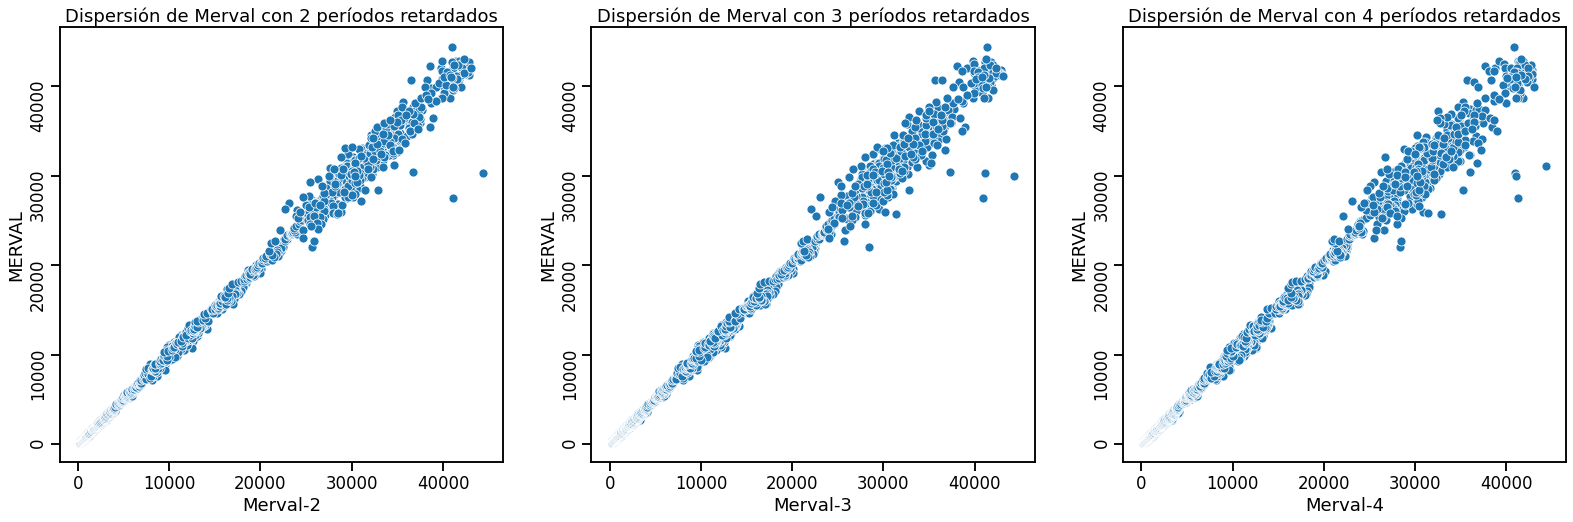

In [110]:
merval = df[['MERV']].dropna()
merval_retrasado_2 = merval.shift(periods=2, axis=0).reset_index()
merval_retrasado_3 = merval.shift(periods=3, axis=0).reset_index()
merval_retrasado_4 = merval.shift(periods=4, axis=0).reset_index()

merval2 = merval.reset_index()

merval_merge = pd.merge(merval2, merval_retrasado_2, on="FECHA")
merval_merge.rename(columns={'MERV_x': 'MERVAL', 'MERV_y': "Merval-2"}, inplace=True)
merval_merge = pd.merge(merval_merge, merval_retrasado_3, on="FECHA")
merval_merge.rename(columns={'MERV':'Merval-3'}, inplace=True)
merval_merge = pd.merge(merval_merge, merval_retrasado_4, on="FECHA")
merval_merge.rename(columns={'MERV':'Merval-4'}, inplace=True)

plt.figure(figsize= (27, 8))
sb.set_context(context="talk")

plt.subplot(131)
ax = sb.scatterplot(x="Merval-2", y="MERVAL", data=merval_merge)
ax.set_title("Dispersión de Merval con 2 períodos retardados")
plt.yticks(rotation=90)

plt.subplot(132)
ax = sb.scatterplot(x="Merval-3", y="MERVAL", data=merval_merge)
ax.set_title("Dispersión de Merval con 3 períodos retardados")
plt.yticks(rotation=90)

plt.subplot(133)
ax = sb.scatterplot(x="Merval-4", y="MERVAL", data=merval_merge)
ax.set_title("Dispersión de Merval con 4 períodos retardados")
plt.yticks(rotation=90)


Se puede ver una clara relación entre los valores de cierre del Merval un día y los valores de cierre 1,2,3 y 4 días antes. Esto significa que el la serie diaria del merval es una serie con un alto grado de autocorrelación, es decir, el valor del Merval un día es explicado en gran parte por el valor del Merval algunos días atrás. Esto es obviamente esperable, de igual manera que se espera que a medida que se consideren periodos más y más atrasados en el tiempo el nivel de auto correlación disminuya. 
En los gráficos también se puede ver que los puntos forman una línea de 45 grados, lo que significa que la autocorrelación es casi perfecta.

**10. Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente link puede ser útil para una primera aproximación.**

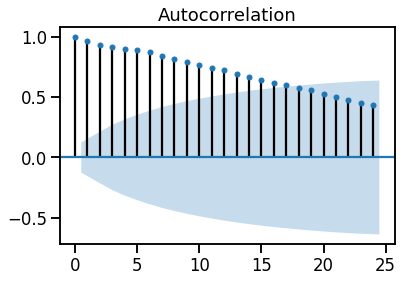

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.MERV.asfreq('M', method='ffill').dropna())
plt.show()

Observando el correlograma de la Función de Autocorrelación podemos asegurar que existe autocorrelación en la serie mensual del Merval. Esto lo sabemos por la forma en que se comportan las barras: descienden gradualmente. 
Podemos confirmar ahora lo que sospechábamos desde el punto anterior: efectivamente existe autocorrelación en la cotizacion del Merval, incluso cuando la unidad de tiempo considerada es mensual. Este resultado es bastante intuitivo al considerar que sino existiese al menos algún grado de autocorrelación la volatilidad del índice sería extrema, ya que la cotización de cada mes sería totalmente aleatoria y no tendría nada que ver con la cotización del mes anterior.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


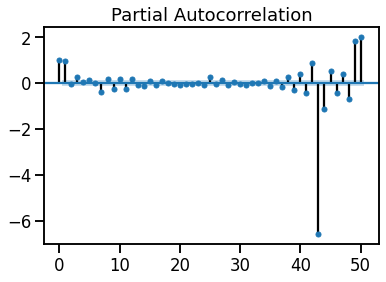

In [111]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df.MERV.asfreq('M', method='ffill').dropna(), lags=50)
#plot_pacf(df.MERV.dropna(), lags=50)
plt.show()

El Correlograma de la función de autocorrelación parcial nos muestra cual es el grado de autocorrelación, es decir, hasta cuántas unidades de tiempo atras (en este caso meses) tienen una influencia estadísticamente significativa en la cotización actual del Merval. A simpe viste se puede decir que los dos meses anteriores tienen una gran influencia, con una visión mas detallada dicha influencia se podría llevar hasta los 4 meses anteriores. Pero a partir de un rezago de 4 unidades se puede decir que los coeficientes dejan de ser significativos. Para un índice financiero, una autocorrelación parcial de orden 4 en términos mensuales es indicativa de una gran inestabilidad económica en ese país, ya que los datos indican que es muy poco probable que el Merval cierre el año a valores parecidos a los que lo empezó. 